# KNN and Decision Trees

## Manual Model Evaluation

The following tasks require you to do the training and prediction of some models by hand.
So grab a piece of paper, your favorite notetaking app or simply a text editor and paint.
This concerns the tasks before the data generation part.

### Data

1. Draw a scatter plot of the following data points. (remember: do it by hand)

#### Training Set

| x1 | x2 | y  |
|----|----|----|
| 0  | 0  | -1 |
| 0  | 1  | -1 |
| 1  | 1  | -1 |
| 1  | 0  | 1  |

#### Test Set

| x1 | x2  | y  |
|----|-----|----|
| 0  | 0.1 | -1 |
| 1  | 0.1 | -1  |

### K-Nearest Neighbors (KNN)

1. Describe a trained KNN model with k=1 based on the training set.
2. Predict the instances in the test set with that model.
3. BONUS: Draw the decision boundary of this model into the scatter plot of the data.
4. Predict the instances in the test set with a KNN model with k=4.

### Decision Tree

1. Describe a trained decision tree with depth $\leq 1$ based on the training set. (Draw the tree. Use the Gini split criterion with splits at the value `0.5` for each attribute.)
2. Predict the instances in the test set with that model.
3. BONUS: Draw the decision boundary of this model into the scatter plot of the data.

## Example Data

Let's look at how such models behave when there is more data.
No need to work through all the tasks exclusively by hand from here on.

### Generate "Perfect" Data Points with Values in $[0, 1) \times [0, 1)$.

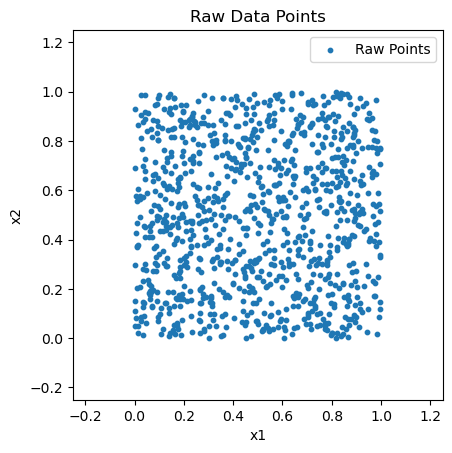

In [596]:
import numpy as np
import matplotlib.pyplot as plt

X_raw = np.random.uniform(0, 1, (1000, 2))

# plot
plt.scatter(X_raw[:, 0], X_raw[:, 1], s=10)
plt.title("Raw Data Points")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-0.25, 1.25)
plt.ylim(-0.25, 1.25)
plt.gca().set_aspect("equal")
plt.legend(["Raw Points"])
plt.show()

### Add Ground Truth Class Labels from Underlying Separating Line

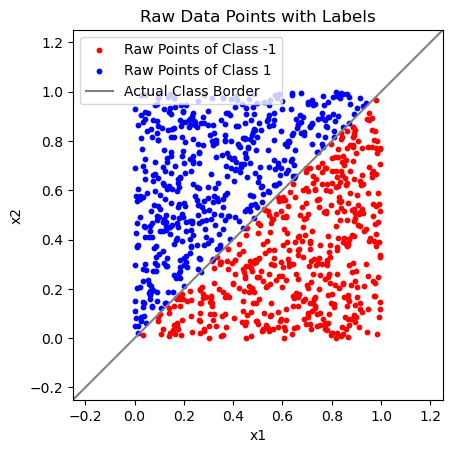

In [597]:
Y = np.array([np.sign(x2 - x1) if np.sign(x2 - x1) != 0 else 1 for x1, x2 in X_raw])

# plot
plt.scatter(X_raw[Y == -1][:, 0], X_raw[Y == -1][:, 1], s=10, c="Red")
plt.scatter(X_raw[Y == 1][:, 0], X_raw[Y == 1][:, 1], s=10, c="Blue")
plt.title("Raw Data Points with Labels")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-0.25, 1.25)
plt.ylim(-0.25, 1.25)
plt.gca().set_aspect("equal")
plt.plot([-1, 2], [-1, 2], c="Gray")
plt.legend(["Raw Points of Class -1", "Raw Points of Class 1", "Actual Class Border"])
plt.show()

### Add Random Noise to the Data Points

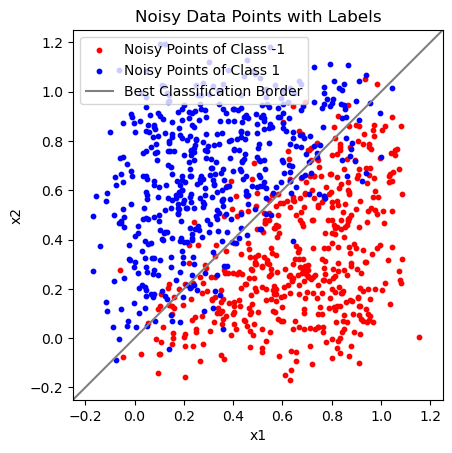

In [598]:
X = X_raw + np.random.normal(0, 0.1, (1000, 2))

# plot
plt.scatter(X[Y == -1][:, 0], X[Y == -1][:, 1], s=10, c="Red")
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], s=10, c="Blue")
plt.title("Noisy Data Points with Labels")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-0.25, 1.25)
plt.ylim(-0.25, 1.25)
plt.gca().set_aspect("equal")
plt.plot([-1, 2], [-1, 2], c="Gray")
plt.legend(["Noisy Points of Class -1", "Noisy Points of Class 1", "Best Classification Border"])
plt.show()

The "Best Classification Border" is the same line as the "Actual Class Border" before.
Because we added normally distributed noise to the data points, this is the theoretically optimal line to distinguish between class -1 and 1.

Note that even this model is not entirely free of errors.

## K-Nearest Neighbors for Classification

You can see how the following model behaves on the example data in the plots below.
Do not skip the second plot! Think about what it shows.

Answer these questions BEFORE changing the code below:

1. How would the "Boundary of Used Neighbours" change when you would reduce the `n_neighbors` parameter?
2. How would the decision boundary (second plot) change when you would reduce the `n_neighbors` parameter?
3. How would the decision boundary (second plot) change when you would set `n_neighbors=800`?

Now temper with the code below to check your answers. (Or check out the solution in case all you get is errors.)

The last code cell before decision trees shows the 0-1 loss of the KNN model on the training and test data separately.

4. Does your model currently overfit or underfit? What tells you that?
5. Change the model parameter(s) in order to make it overfit!
6. Change the model parameter(s) in order to make it underfit!

Make sure to run the whole notebook multiple times to get results on different data!
It might be the case that your result in one of the last 3 tasks is simply not positive by chance.

7. Is there an evaluation technique we could have used here instead of resampling the entire dataset? In practice we usually don't have the option to just regenerate a dataset...
8. Rerun the whole notebook for a large and a small value of `n_neighbors`, multiple times each. In what case do the models have low/high bias and in what case do they have low/high variance? How do you evaluate that?
9. What value for `n_neighbors` maximizes the model variance?

0.19865030139982529


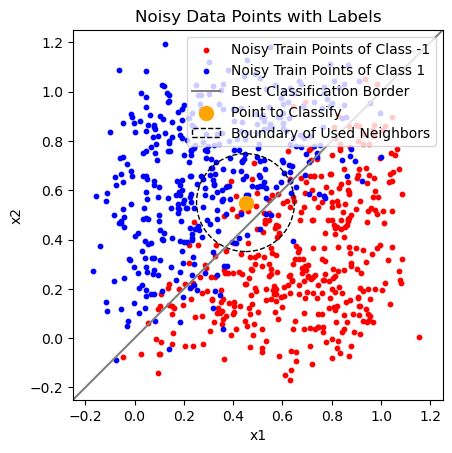

In [599]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# split data in train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, Y_train)

knn_example_point = np.array([0.45, 0.55])
k_neighbors = knn.kneighbors([knn_example_point])
max_neighbors_distance = np.max(k_neighbors[0][0])
print(max_neighbors_distance)

# plot
plt.scatter(X_train[Y_train == -1][:, 0], X_train[Y_train == -1][:, 1], s=10, c="Red")
plt.scatter(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], s=10, c="Blue")
plt.title("Noisy Data Points with Labels")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-0.25, 1.25)
plt.ylim(-0.25, 1.25)
plt.plot([-1, 2], [-1, 2], c="Gray")
plt.gca().set_aspect("equal")

plt.scatter([0.45], [0.55], s=100, c="Orange")
k_neighbors_circle = plt.Circle(knn_example_point, max_neighbors_distance, fill=False, linestyle="dashed")
ax = plt.gca()
ax.add_patch(k_neighbors_circle)

plt.legend([
    "Noisy Train Points of Class -1",
    "Noisy Train Points of Class 1",
    "Best Classification Border",
    "Point to Classify",
    "Boundary of Used Neighbors"])
plt.show()

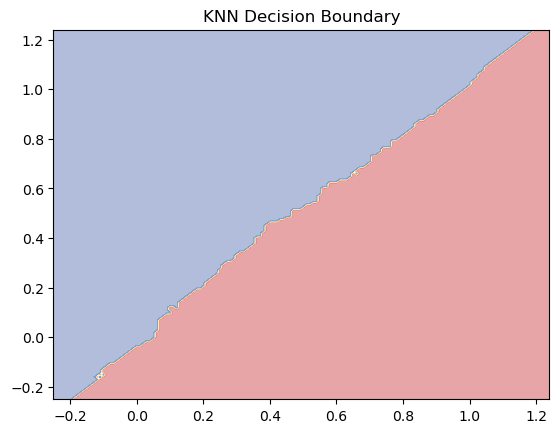

In [600]:
# Plot the Prediction Behaviour of the KNN Classifier
xx, yy = np.meshgrid(np.arange(-0.25, 1.25, 0.01),
                     np.arange(-0.25, 1.25, 0.01))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.title("KNN Decision Boundary")
plt.show()

In [601]:
from sklearn.metrics import zero_one_loss

knn_y_pred_train = knn.predict(X_train)
knn_y_pred_test = knn.predict(X_test)

print("Train loss:", zero_one_loss(Y_train, knn_y_pred_train))
print("Test loss:", zero_one_loss(Y_test, knn_y_pred_test))

Train loss: 0.09999999999999998
Test loss: 0.12


## Decision Tree for Classification

You can see how the following model behaves on the example data in the plots below.
Do not skip the second plot! Think about what it shows.

Answer these questions BEFORE changing the code below:

1. How would the drawn decision tree possibly change for different values of `max_depth`?
2. How would the decision boundary (second plot) change when you would reduce the `max_depth` parameter?
3. How would the decision boundary (second plot) change when you would increase the `max_depth`?

Now temper with the code below to check your answers. (Or check out the solution in case all you get is errors.)

The last code cell shows the 0-1 loss of the decision tree model on the training and test data separately.

4. Does your model currently overfit or underfit?
5. Change the model parameter(s) in order to make it overfit!
6. Change the model parameter(s) in order to make it underfit!

Make sure to run the whole notebook multiple times to get results on different data!
It might be the case that your result in one of the last 3 tasks is simply not positive by chance.

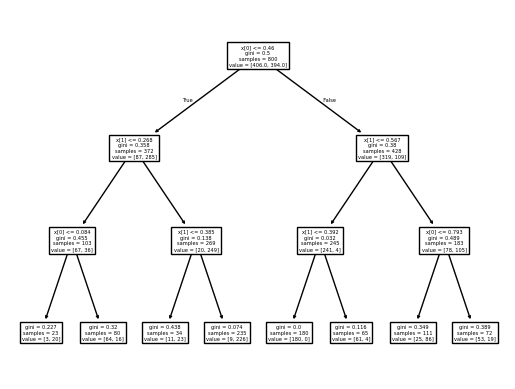

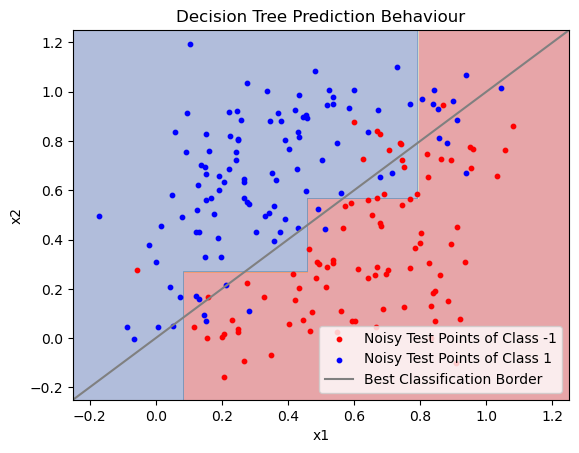

In [602]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train, Y_train)

dtree_y_pred = dtree.predict(X_train)

plot_tree(dtree)
plt.show()

# Plot the Prediction Behaviour of the Decision Tree
xx, yy = np.meshgrid(np.arange(-0.25, 1.25, 0.001),
                     np.arange(-0.25, 1.25, 0.001))
Z = dtree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

plt.scatter(X_test[Y_test == -1][:, 0], X_test[Y_test == -1][:, 1], s=10, c="Red")
plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], s=10, c="Blue")
plt.plot([-1, 2], [-1, 2], c="Gray")
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-0.25, 1.25)
plt.ylim(-0.25, 1.25)
plt.title('Decision Tree Prediction Behaviour')
plt.legend([
    "Noisy Test Points of Class -1",
    "Noisy Test Points of Class 1",
    "Best Classification Border"
])
plt.show()

In [603]:
dtree_y_pred_train = dtree.predict(X_train)
dtree_y_pred_test = dtree.predict(X_test)

print("Train loss:", zero_one_loss(Y_train, dtree_y_pred_train))
print("Test loss:", zero_one_loss(Y_test, dtree_y_pred_test))

Train loss: 0.10875000000000001
Test loss: 0.16000000000000003
